# Import

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# RGB zu grayscale umwandeln

In [3]:
def rgb_to_grayscale(image):
    return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

# Histogramm erstellen Funktion

In [4]:
def computeHisto(image):
    histo = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        histo[pixel_value] += 1
    return histo

# Histogram plotten

In [5]:
def plot_histogram(histo, title="Histogram"):
    plt.figure()
    plt.bar(range(256), histo, width=1, color='gray')
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()


# Funktionen anwenden

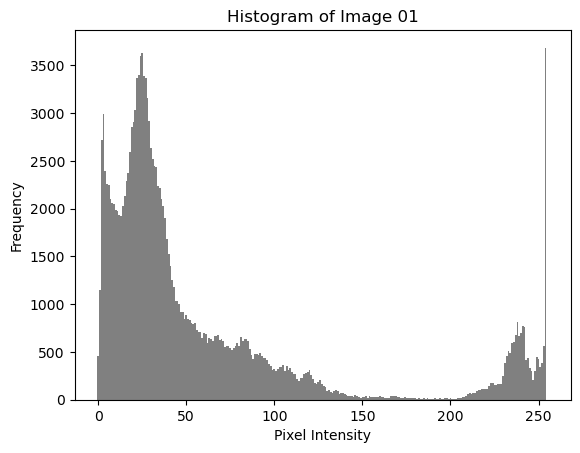

In [6]:

image01 = np.array(Image.open("assets/bild01.jpg"))
image02 = np.array(Image.open("assets/bild02.jpg"))
image03 = np.array(Image.open("assets/bild03.jpg"))
image04 = np.array(Image.open("assets/bild04.jpg"))
image05 = np.array(Image.open("assets/bild05.jpg"))


gray01 = rgb_to_grayscale(image01)
gray02 = rgb_to_grayscale(image02)
gray03 = rgb_to_grayscale(image03)
gray04 = rgb_to_grayscale(image04)
gray05 = rgb_to_grayscale(image05)

histo01 = computeHisto(gray01)
histo02 = computeHisto(gray02)
histo03 = computeHisto(gray03)
histo04 = computeHisto(gray04)
histo05 = computeHisto(gray05)



plot_histogram(histo01, title="Histogram of Image 01")


Bild01: Das Histogramm weist eine starke Konzentration der Grauwerte im hellen Bereich auf. Dies deutet auf eine überbelichtung hin, da viele Pixel an den oberen Grenzen (Clipping) liegen und Details in den hellen Partien verloren gehen.

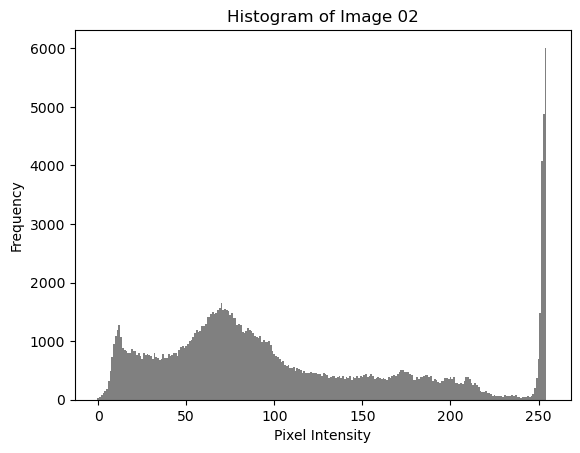

In [7]:
plot_histogram(histo02, title="Histogram of Image 02")


Helligkeitsverschiebung:

Im Histogramm von Bild02 ist eine Verschiebung in Richtung der hohen Grauwerte zu erkennen.

Clipping-Effekt und Datenverlust: 

Durch die Erhoehung der Helligkeit werden einige Pixelwerte so weit angehoben, dass sie den maximal darstellbaren Wert erreichen. Diese Pixel werden "geclippt", sie verlieren ihre feinen Abstufungen, da alle Werte oberhalb eines bestimmten Schwellenwerts als maximal heller Wert erscheinen.

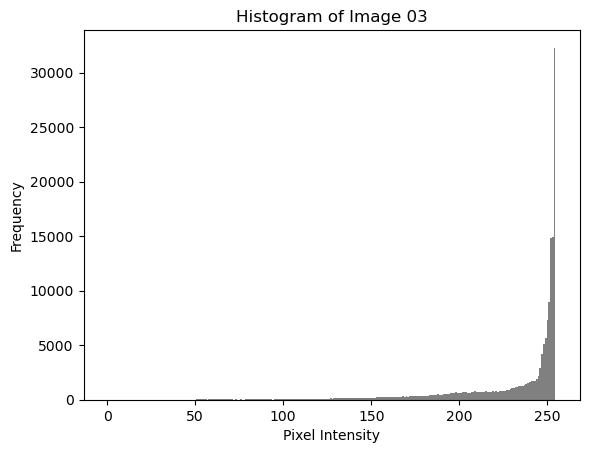

In [8]:
plot_histogram(histo03, title="Histogram of Image 03")


Bild03: Hier ist das Histogramm vorwiegend im dunklen Bereich konzentriert. Das zeigt eine Unterbelichtung an, wodurch Details in den Schatten verloren gehen, weil die Pixelwerte zu niedrig sind.

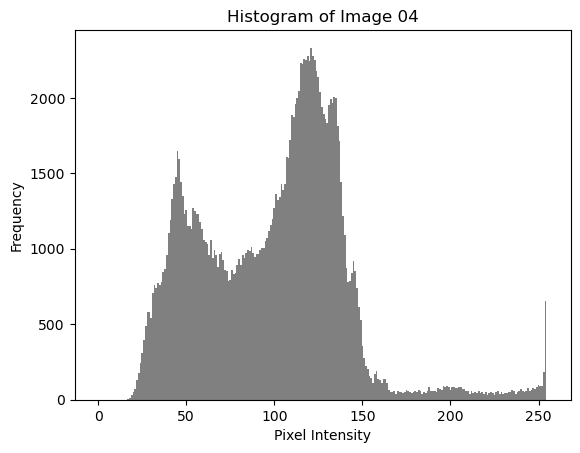

In [9]:
plot_histogram(histo04, title="Histogram of Image 04")


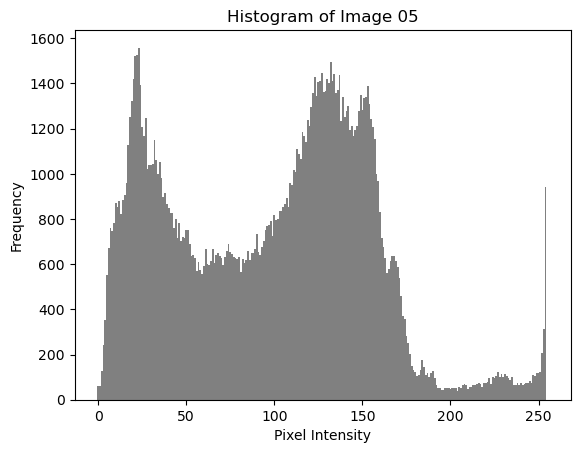

In [10]:
plot_histogram(histo05, title="Histogram of Image 05")

1. Stärkere Konzentration im dunklen Bereich 

2. Verstärkter Ausschlag im hellen Bereich 

3. Reduzierte Verteilung der Mitteltone

Fazit:
Die Bearbeitung hat vor allem zu einer Kontraststeigerung gefuehrt. Dies erkennt man an den ausgepraegten Peaks an den Extremen  und der verminderten Darstellung der mittleren Grauwerte, wodurch der Dynamikbereich des Bildes erweiterter genutzt wird.

Implementieren Sie eine Funktion, die eine Punktoperation mithilfe einer Lookup-Tabelle
zum Aufhellen eines Bildes durchf¨uhrt.
a) In Aufgabe (4b) gingen Daten beim Aufhellen eines Bildes verloren. Wie k¨onnte
dies vermieden werden?
b) Damit beim Aufhellen von Bild01 keine Daten verloren gehen, soll eine Lookup-
Tabelle verwendet werden. Versuchen Sie mit der Lookup-Tabelle die dunklen
Bildbereiche des Bildes aufzuhellen ohne die hellen Bereiche zu stark zu ver¨andern.

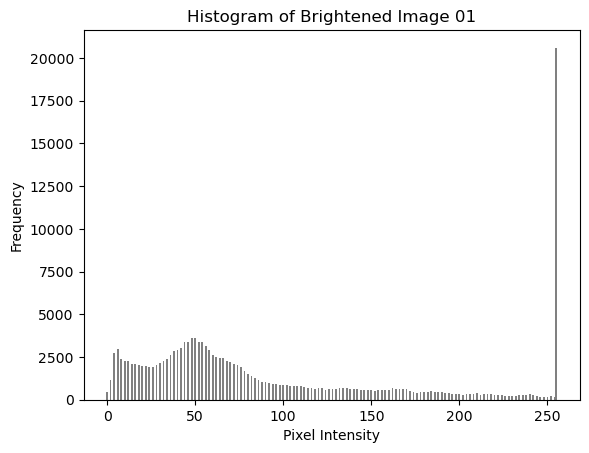

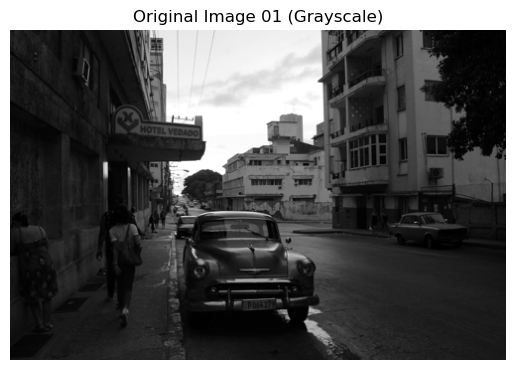

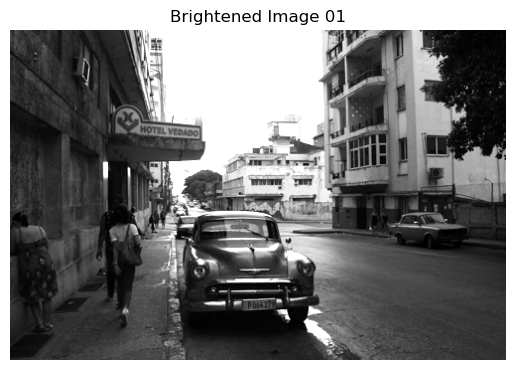

In [11]:


def brighten_with_lookup(image, lookup_table):
    return lookup_table[image]

def create_lookup_table():
    lookup_table = np.arange(256, dtype=np.uint8)
    for i in range(256):
        if i < 128: 
            lookup_table[i] = min(255, int(i * 2.0))
        else: 
            lookup_table[i] = min(255, int(i * 2.0))
    return lookup_table

lookup_table = create_lookup_table()
brightened_image01 = brighten_with_lookup(gray01, lookup_table)

plot_histogram(computeHisto(brightened_image01), title="Histogram of Brightened Image 01")
plt.figure()
plt.imshow(gray01, cmap='gray')
plt.title("Original Image 01 (Grayscale)")
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(brightened_image01, cmap='gray')
plt.title("Brightened Image 01")
plt.axis('off')
plt.show()